In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard

# Define constants
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32
NUM_CLASSES = 5  # Number of animal species
EPOCHS = 100

# Define data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
    validation_split=0.2  # Split data into training and validation sets
)

train_generator = train_datagen.flow_from_directory(
    'animal',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Specify that this is the training set
)

validation_generator = train_datagen.flow_from_directory(
    'animal',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Specify that this is the validation set
)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

moniter = moniter_accuracy()
tensorboard = TensorBoard(log_dir="logs/")

class moniter_accuracy(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.99:
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True
            

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE ,
    callbacks=[moniter,tensorboard]
)

Found 40 images belonging to 5 classes.
Found 10 images belonging to 5 classes.
Epoch 1/100
1/1 [==============================] - 1s 902ms/step - loss: 1.6057 - accuracy: 0.2188
Epoch 2/100
1/1 [==============================] - 0s 102ms/step - loss: 1.5805 - accuracy: 0.2188
Epoch 3/100
1/1 [==============================] - 0s 89ms/step - loss: 1.5320 - accuracy: 0.3438
Epoch 4/100
1/1 [==============================] - 0s 62ms/step - loss: 1.4429 - accuracy: 0.3750
Epoch 5/100
1/1 [==============================] - 0s 84ms/step - loss: 1.4656 - accuracy: 0.4062
Epoch 6/100
1/1 [==============================] - 0s 105ms/step - loss: 1.3294 - accuracy: 0.5625
Epoch 7/100
1/1 [==============================] - 0s 84ms/step - loss: 1.3053 - accuracy: 0.6250
Epoch 8/100
1/1 [==============================] - 0s 102ms/step - loss: 2.0263 - accuracy: 0.3438
Epoch 9/100
1/1 [==============================] - 0s 86ms/step - loss: 1.2121 - accuracy: 0.5000
Epoch 10/100
1/1 [================

In [15]:
model.save("animal.h5")

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def predict_and_display(image_path):
    class_names = ['cat', 'dog', 'elephant', 'horse', 'ox']
    model = tf.keras.models.load_model('animal.h5')  # Change 'path_to_your_model.h5' to your model's path
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to load image.")
        return None
    
    resized_image = cv2.resize(image, (150, 150))  # Assuming your model expects input images of size (150, 150)
    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
    resized_image = resized_image.astype('float32') / 255.0
    resized_image = np.expand_dims(resized_image, axis=0)
    
    predictions = model.predict(resized_image)
    predicted_class_index = np.argmax(predictions)
    predicted_label = class_names[predicted_class_index]
    
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()




1/1 [==============================] - 0s 83ms/step


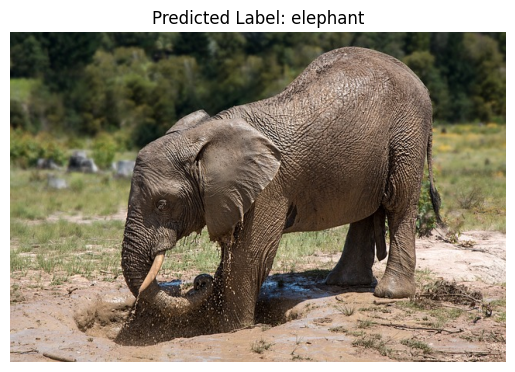

In [17]:

image_path = '1.jpg' 
predict_and_display(image_path)